Seguimos con los datos de Rössler, vemos cómo cambia la predicción cambiando el tamaño de la ventana temporal (window_size) y de cuántos pasos miro hacia atrás (look_back).

In [1]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt
import git
import os, sys

path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'utils'))
from functions import *

os.chdir(path_git)

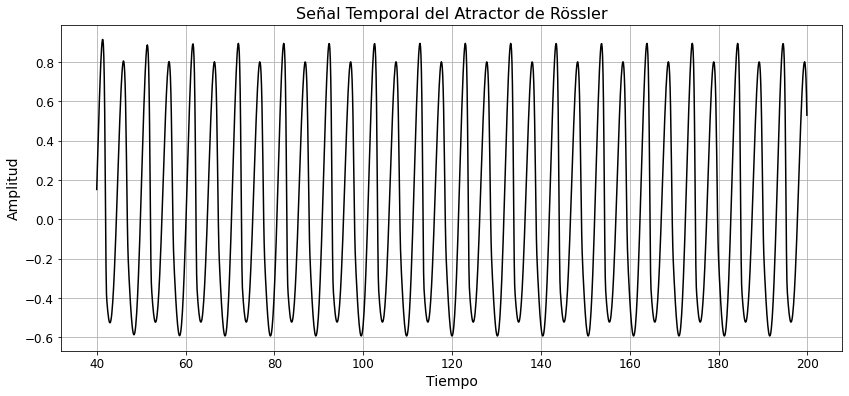

In [2]:
# Generamos la señal temporal

# Parámetros para el atractor de Rössler
a = 0.2
b = 0.2
c = 5.7

# Paso de tiempo y número de pasos
dt = 0.1
num_steps = 2000

# Vector de tiempos
t = np.arange(0, num_steps * dt, dt)

# Generar la secuencia temporal para el atractor de Rössler
raw_seq, _, _ = rossler_attractor(a, b, c, dt, num_steps)

# Normalizar la secuencia
maximo = np.max(np.abs(raw_seq))
raw_seq = raw_seq / maximo

# Acortar la secuencia para que no sea tan larga y tenga una amplitud similar
raw_seq = raw_seq[400:]
t = t[400:]

# Graficar la señal temporal
plt.figure(figsize=(14, 6))
plt.plot(t, raw_seq, c = "k")
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Amplitud', fontsize = 14)
plt.title('Señal Temporal del Atractor de Rössler', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

In [4]:
#Dejo fijo cuánto miramos del 'pasado' y cuánto del 'futuro', es decir:
# Cantidad de valores por cada paso temporal
n_features = 1

# longitud de la cadena izquierda
len_left_chain = 500

# longitud de la cadena derecha
len_right_chain = 720

In [5]:
max_window_size = len(raw_seq)-len_left_chain - len_right_chain
#Máximo del tamaño de la ventana 
print(max_window_size)

380


In [6]:
def sequences_rl(window_size, seq_raw = raw_seq, len_left = len_left_chain, len_right = len_right_chain):
    #Armo la secuencia de la izquierda para luego armar el training set
    raw_seq_1 = seq_raw[0 : len_left]
    t_1 = t[0 : len_left]
    
    #Armo la secuencia a predecir
    raw_seq_window = seq_raw[len_left :len_left + window_size]
    t_window = t[len_left :len_left + window_size]

    #Armo la secuencia de la derecha 
    raw_seq_2 = seq_raw[len_left + window_size : len_left + window_size + len_right]
    t_2 = t[len_left + window_size : len_left + window_size + len_right]
    
    #La invierto para poder usar la misma estructura
    raw_seq_2_bw = raw_seq_2[::-1]
    t_2_bw = t_2[::-1]
    
    
    return raw_seq_1, t_1, raw_seq_window, t_window, raw_seq_2_bw, t_2_bw

In [ ]:
def prediccion_wp_iter(window_size, look_back, iter = 10, n_features = 1, seq_raw = raw_seq, len_left = len_left_chain, len_right = len_right_chain):

    raw_seq_1, t_1, raw_seq_window, t_window, raw_seq_2_bw, t_2_bw = sequences_rl(window_size, seq_raw, len_left, len_right )
    
    prediction_mean_weighted = np.zeros((window_size, iter))

    for i in range(iter):
        
        predicciones_adelante_1, _ = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window)

        predicciones_adelante_2_bw, _ = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1])
        predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]

        # Promedio pesado
        prediction_mean_weighted[:,i] = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)

    np.save('saved_iterations/prediction_mean_weighted_{}_{}.npy'.format(window_size, look_back), prediction_mean_weighted)

    return raw_seq_1, t_1, raw_seq_window, t_window, raw_seq_2_bw, t_2_bw, prediction_mean_weighted

In [8]:
window_size = 110
look_back = 45
raw_seq_1, t_1, raw_seq_window, t_window, raw_seq_2_bw, t_2_bw, pred_iter = prediccion_wp_iter(window_size, look_back, iter = 5)

0


c:\Users\cande\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

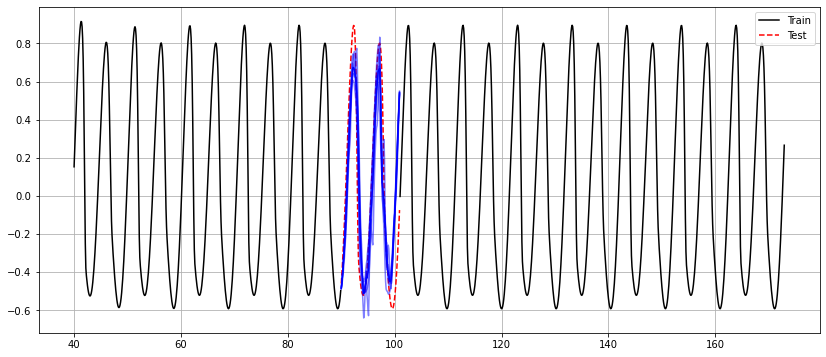

In [9]:
#output = np.load('saved_iterations/prediction_mean_weighted.npy')

iterations = 5 
fig = plt.figure(figsize = (14, 6))
plt.plot(t_1, raw_seq_1, 'k', label = 'Train')
plt.plot(t_2_bw[::-1], raw_seq_2_bw[::-1], 'k')
plt.plot(t_window, raw_seq_window, '--r', label = 'Test')
for i in range(iterations):
    plt.plot(t_window, pred_iter[:, i],'b', alpha = 0.5)
mean_prediction = np.mean(pred_iter, axis=1)
    
    #std_prediction = np.std(output, axis=1)
plt.plot(t_window, mean_prediction, c="b", label = "")
plt.grid()
plt.legend()
plt.show()
#plt.savefig('figures/rossler_signal_prediction_mean_iteration.png')

In [ ]:
def plot_iter(name, iterations, mean_prediction, std_prediction,  t_1, raw_seq_1, t_2, raw_seq_2, t_window, raw_seq_window, look_back):
    fig = plt.figure(figsize = (14, 6))
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(t_1, raw_seq_1, 'k', label='Train')
    ax.plot(t_2[::-1], raw_seq_2[::-1], 'k')
    ax.plot(t_window, raw_seq_window, '--r', label='Test', alpha=0.5)

    
    #mean_prediction = np.mean(pred_iter, axis = 1)
    #std_prediction = np.std(pred_iter, axis = 1)
    
    # Plot the mean prediction
    ax.plot(t_window, mean_prediction, 'b', label='Mean Prediction')

    # Plot the 1-sigma confidence interval
    ax.fill_between(t_window, mean_prediction - std_prediction, mean_prediction + std_prediction, color='blue', alpha=0.2, label='1-Sigma Interval')
   
    #for i in range(iterations):
    #    plt.plot(t_window, pred_iter[:, i],'b', alpha = 0.2)
    
    # Add grid, legend, and labels
    ax.grid()
    ax.legend(fontsize = 12)
    ax.set_xlabel('Time', fontsize = 14)
    ax.set_ylabel('Signal Amplitude', fontsize = 14)
    ax.set_title('1-Sigma Error Plot of Signal Predictions', fontsize = 15)
    plt.savefig("figures/{}_window{}_LB{}.png".format(name, len(raw_seq_window), look_back))
    #plt.show()

    return None

In [42]:
def error_ws_lb(name, window_size_v, look_back_v, iter = 10, n_features = 1, seq_raw = raw_seq, len_left = len_left_chain, len_right = len_right_chain):

    mse_ws_lb = np.zeros((len(window_size_v), len(look_back_v)))

    Pred = []
    

    for i in range(len(window_size_v)):
        
        for j in range(len(look_back_v)):
            
            window_size = window_size_v[i]
            look_back = look_back_v[j]

            raw_seq_1, t_1, raw_seq_window, t_window, raw_seq_2_bw, t_2_bw, pred_iter = prediccion_wp_iter(window_size, look_back, iter)    
            Pred.append(pred_iter)
            
            mean_prediction = np.mean(pred_iter, axis = 1)
            #mean_pred.append(mean_prediction)

            std_prediction = np.std(pred_iter, axis = 1)
            #std_pred.append(std_prediction)

            plot_iter(name, iterations, mean_prediction, std_prediction,  t_1, raw_seq_1, t_2_bw, raw_seq_2_bw, t_window, raw_seq_window, look_back)
            
            mse_ws_lb[i, j] = MSE(raw_seq_window, mean_prediction)

    return mse_ws_lb, Pred
        

In [ ]:
Time_Window_v = np.arange(60, 200, 30)
#look back debe ser menor a time window size
Look_Back_v = np.arange(25, 55, 5)
len(Time_Window_v)*len(Look_Back_v)
MSE_W_LB_v1, Pred_iters_v1 = error_ws_lb("Rossler_v1", Time_Window_v, Look_Back_v, iter = 5)

0


c:\Users\cande\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━

In [ ]:
def plot_mse_error(mse_ws_lb, window_size_v, look_back_v):
    """
    Plots a heatmap of the Mean Squared Error (MSE) from the mse_ws_lb matrix.
    
    :param mse_ws_lb: A 2D numpy array of MSE values
    :param window_size_v: List of window sizes
    :param look_back_v: List of look-back values
    """
    plt.figure(figsize=(8, 6))
    
    # Crear el mapa de color
    cax = plt.imshow(mse_ws_lb, cmap='viridis', interpolation='nearest', aspect='auto')
    
    # Añadir la barra de color
    plt.colorbar(cax)
    colorbar.set_label('MSE', fontsize = 12)
    
    # Etiquetas de los ejes
    plt.xticks(ticks=np.arange(len(look_back_v)), labels=look_back_v)
    plt.yticks(ticks=np.arange(len(window_size_v)), labels=window_size_v)
    
    # Etiquetas y título
    plt.xlabel('Look Back Value', fontsize = 14)
    plt.ylabel('Window Size Value', fontsize = 14)
    plt.title('Prediction Error', fontsize = 15)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

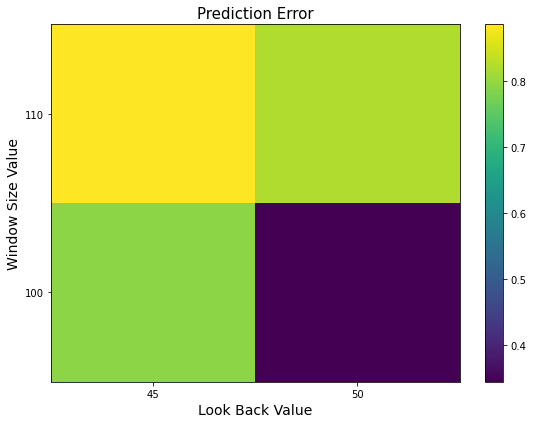

In [ ]:
plot_mse_error(MSE_W_LB_v1, Time_Window_v, Look_Back_v)